# Test the projection convergence of our basis constructed using OMP

In [1]:
import numpy as np
import scipy as sp
import importlib
import seaborn as sns
import matplotlib.pyplot as plt
import pdb

import sys
sys.path.append("../../")
import pyApproxTools as pat
importlib.reload(pat)

%matplotlib inline

### Collective OMP algorithm

We construct a measurement basis $W_m$ based on a given approximation basis $V_n$. Our ambient space $V$ is $H_0^1([0,1])$. Here $V_n$ is the sinusoids, normalised in $H_0^1([0,1])$, so $V_n = \mathrm{span}\{\phi_1,\ldots,\phi_n\}$, where $\phi_k = \frac{\sqrt{2}}{\pi k} \sin(k \pi x)$.

The measurements are assumed to be point evaluations, which have representer in $H_0^1$ of
$$
\omega_{x_0}(x) = \frac{1}{\sqrt{x_0 (1-x_0)}}
\begin{cases}
x (1 - x_0) & \text{for } x \le x_0 \\
(1 - x) x_0 & \text{for } x > x_0
\end{cases}
$$

This implementation of the algorithm looks at the best choice of $\omega$ from the dictionary $\mathcal{D}$ against the entire basis $V_n$, hence is called the _collective_ approach. That is, at each step of the algorithm choose
$$
\omega_k 
= \mathrm{argmax}_{\omega\in\mathcal{D}} |\left\langle \omega, v - P_{W_{k-1}} v \right\rangle| 
= \mathrm{argmax}_{\omega\in\mathcal{D}} \| P_{V_n} (\omega - P_{W_{k-1}} \omega ) \|
= \mathrm{argmax}_{\omega\in\mathcal{D}} \sum_{i=1}^n |\left\langle \phi_i - P_{W_{k-1}}\phi_i, \omega \right\rangle|^2
$$
It is precisely the last expression on the right that is used in the code.

### Lets look at $\beta(V_n, W_m)$ for our collective OMP basis and a random basis for comparison
Note that this calculation is done for a small dictionary that only has $N=10^3$ elements, to save time

In [2]:
N = 1e3
dictionary = pat.make_unif_dictionary(N)

ns = [10,20,40]
np.random.seed(3)
#n = 20
m = 200
bs_omp = np.zeros((len(ns), m))
bs_rand = np.zeros((len(ns), m))

Vn = pat.make_sin_basis(ns[-1])
Wms_omp = []
Wms_rand = []

for j, n in enumerate(ns):

    gbc = pat.CollectiveOMP(dictionary, Vn.subspace(slice(0,n)), verbose=True)
    Wm_omp = gbc.construct_to_m(m)
    Wms_omp.append(Wm_omp)
    Wm_omp_o = Wm_omp.orthonormalise()

    Wm_rand = pat.make_random_delta_basis(m)
    Wms_rand.append(Wm_rand)
    Wm_rand_o = Wm_rand.orthonormalise()

    BP_omp = pat.BasisPair(Wm_omp_o, Vn)
    BP_rand = pat.BasisPair(Wm_rand_o, Vn)
    for i in range(n, m):
        print('FB step ' + str(i))
        BP_omp_s = BP_omp.subspace(Wm_indices=slice(0,i), Vn_indices=slice(0,n)) #pat.BasisPair(Wm_omp_o.subspace(slice(0,i)), Vn.subspace(slice(0,n)))
        FB_omp = BP_omp_s.make_favorable_basis()
        bs_omp[j, i] = FB_omp.beta()

        BP_rand_s = BP_rand.subspace(Wm_indices=slice(0,i), Vn_indices=slice(0,n)) #pat.BasisPair(Wm_rand_o.subspace(slice(0,i)), Vn.subspace(slice(0,n)))
        FB_rand = BP_rand_s.make_favorable_basis()
        bs_rand[j, i] = FB_rand.beta()



Generating basis from greedy algorithm with dictionary: 
i 	 || P_Vn (w - P_Wm w) ||
1 : 	 75 	 0.8177539503209322
2 : 	 925 	 0.783179800325761
3 : 	 241 	 0.5159988853919093
4 : 	 793 	 0.446070758476858
5 : 	 384 	 0.27227892820679417
6 : 	 670 	 0.22488966073208772
7 : 	 154 	 0.1880473222420842
8 : 	 858 	 0.09113981995776672
9 : 	 462 	 0.08577700571757543
10 : 	 31 	 0.06034375722337916
11 : 	 311 	 0.05973304918206092
12 : 	 968 	 0.05722022726737783
13 : 	 735 	 0.052418670890479205
14 : 	 611 	 0.03717236991383885
15 : 	 194 	 0.015529579909649096
16 : 	 112 	 0.012165597273407394
17 : 	 504 	 0.008201910341141816
18 : 	 827 	 0.007952216635360991
19 : 	 424 	 0.00731417197817225
20 : 	 348 	 0.007205142551584737
21 : 	 895 	 0.00719726154568018
22 : 	 51 	 0.007164356371828749
23 : 	 274 	 0.006784982677305154
24 : 	 948 	 0.006580008909850826
25 : 	 704 	 0.003981508993143597
26 : 	 577 	 0.003856526181660785
27 : 	 764 	 0.0033485057594259348
28 : 	 641 	 0.0032506427816

FB step 105
FB step 106
FB step 107
FB step 108
FB step 109
FB step 110
FB step 111
FB step 112
FB step 113
FB step 114
FB step 115
FB step 116
FB step 117
FB step 118
FB step 119
FB step 120
FB step 121
FB step 122
FB step 123
FB step 124
FB step 125
FB step 126
FB step 127
FB step 128
FB step 129
FB step 130
FB step 131
FB step 132
FB step 133
FB step 134
FB step 135
FB step 136
FB step 137
FB step 138
FB step 139
FB step 140
FB step 141
FB step 142
FB step 143
FB step 144
FB step 145
FB step 146
FB step 147
FB step 148
FB step 149
FB step 150
FB step 151
FB step 152
FB step 153
FB step 154
FB step 155
FB step 156
FB step 157
FB step 158
FB step 159
FB step 160
FB step 161
FB step 162
FB step 163
FB step 164
FB step 165
FB step 166
FB step 167
FB step 168
FB step 169
FB step 170
FB step 171
FB step 172
FB step 173
FB step 174
FB step 175
FB step 176
FB step 177
FB step 178
FB step 179
FB step 180
FB step 181
FB step 182
FB step 183
FB step 184
FB step 185
FB step 186
FB step 187
FB s

199 : 	 463 	 1.1232744726942006e-05


Done!
FB step 20
FB step 21
FB step 22
FB step 23
FB step 24
FB step 25
FB step 26
FB step 27
FB step 28
FB step 29
FB step 30
FB step 31
FB step 32
FB step 33
FB step 34
FB step 35
FB step 36
FB step 37
FB step 38
FB step 39
FB step 40
FB step 41
FB step 42
FB step 43
FB step 44
FB step 45
FB step 46
FB step 47
FB step 48
FB step 49
FB step 50
FB step 51
FB step 52
FB step 53
FB step 54
FB step 55
FB step 56
FB step 57
FB step 58
FB step 59
FB step 60
FB step 61
FB step 62
FB step 63
FB step 64
FB step 65
FB step 66
FB step 67
FB step 68
FB step 69
FB step 70
FB step 71
FB step 72
FB step 73
FB step 74
FB step 75
FB step 76
FB step 77
FB step 78
FB step 79
FB step 80
FB step 81
FB step 82
FB step 83
FB step 84
FB step 85
FB step 86
FB step 87
FB step 88
FB step 89
FB step 90
FB step 91
FB step 92
FB step 93
FB step 94
FB step 95
FB step 96
FB step 97
FB step 98
FB step 99
FB step 100
FB step 101
FB step 102
FB step 103
FB step 104
FB step 105
FB 

174 : 	 662 	 0.0001514604937044258
175 : 	 693 	 0.00015049801506070645
176 : 	 320 	 0.0001503442268475746
177 : 	 300 	 0.00014906008067029665
178 : 	 760 	 0.00012160327357675838
179 : 	 241 	 0.00012053192242011593
180 : 	 11 	 0.00011469600822495118
181 : 	 988 	 0.00011469600822494523
182 : 	 261 	 0.0001119014193857297
183 : 	 751 	 0.00010955446177511541
184 : 	 741 	 0.00010875779954526528
185 : 	 712 	 0.00010646326574693104
186 : 	 992 	 0.00010527652930573605
187 : 	 7 	 0.00010527652930572544
188 : 	 87 	 0.00010245772131713494
189 : 	 913 	 9.844919623707956e-05
190 : 	 193 	 9.125538870880659e-05
191 : 	 80 	 8.921166935875757e-05
192 : 	 821 	 8.612151658021256e-05
193 : 	 217 	 8.377360752380821e-05
194 : 	 209 	 8.192221515023144e-05
195 : 	 791 	 8.097668531342202e-05
196 : 	 799 	 8.061441778505743e-05
197 : 	 201 	 7.9613938899089e-05
198 : 	 937 	 7.936516755916305e-05
199 : 	 62 	 7.936516755916562e-05


Done!
FB step 40
FB step 41
FB step 42
FB step 43
FB step 

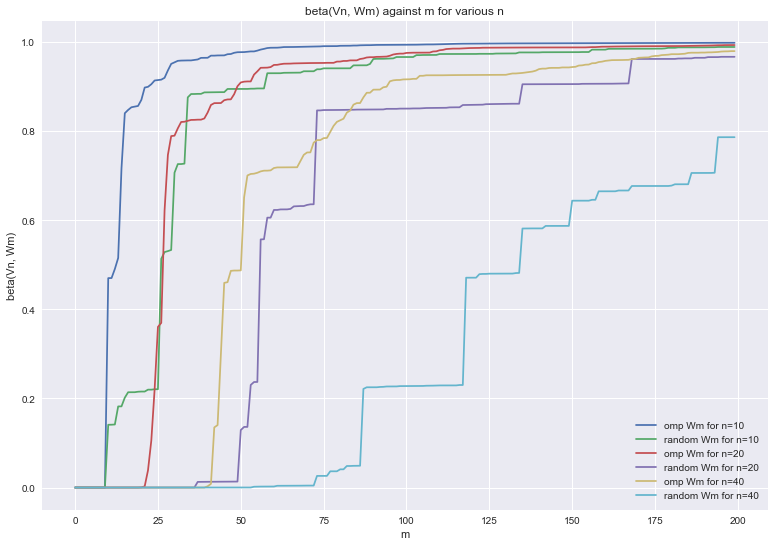

In [3]:
sns.set_palette("deep")
cp = sns.color_palette()

axs = []
fig = plt.figure(figsize=(13, 9))
ax = fig.add_subplot(1, 1, 1, title='beta(Vn, Wm) against m for various n')#, title=r'$\beta(V_n, W_m)$ against $m$ for various $n$')

for i, n in enumerate(ns):
    plt.plot(range(m), bs_omp[i, :], label='omp Wm for n={0}'.format(n))#r'OMP constructed $W_m$, $n={{{0}}}$'.format(n))
    plt.plot(range(m), bs_rand[i, :], label='random Wm for n={0}'.format(n))#r'Random $W_m$, $n={{{0}}}$'.format(n))

ax.set(xlabel='m', ylabel='beta(Vn, Wm)')#r'$m$', ylabel=r'$\beta(V_n, W_m)$')
plt.legend(loc=4)
plt.show()

## Take the case $n=20$, lets inspect the actual evaluation points for the basis $W_m$
If $W_m = \mathrm{span}\{\omega_{x_1},\ldots,\omega_{x_m}\}$, where $\langle \omega_{x_k}, f\rangle = f(x_k)$, then what is our set of $x_k$?

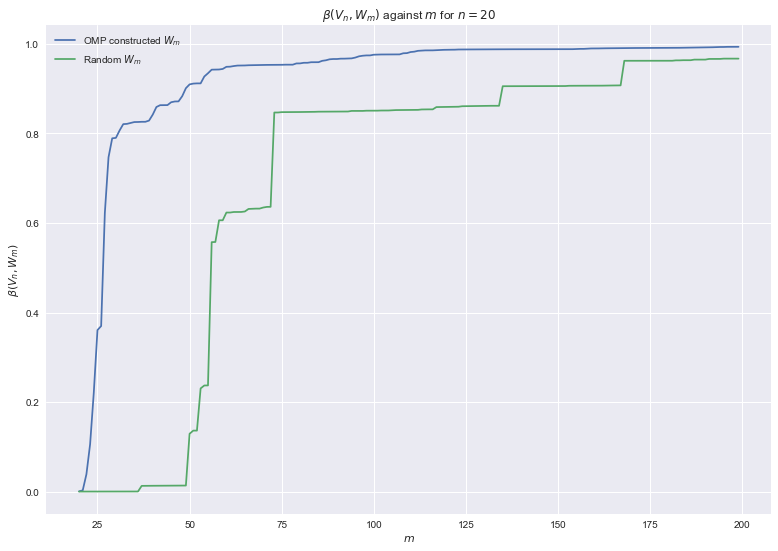

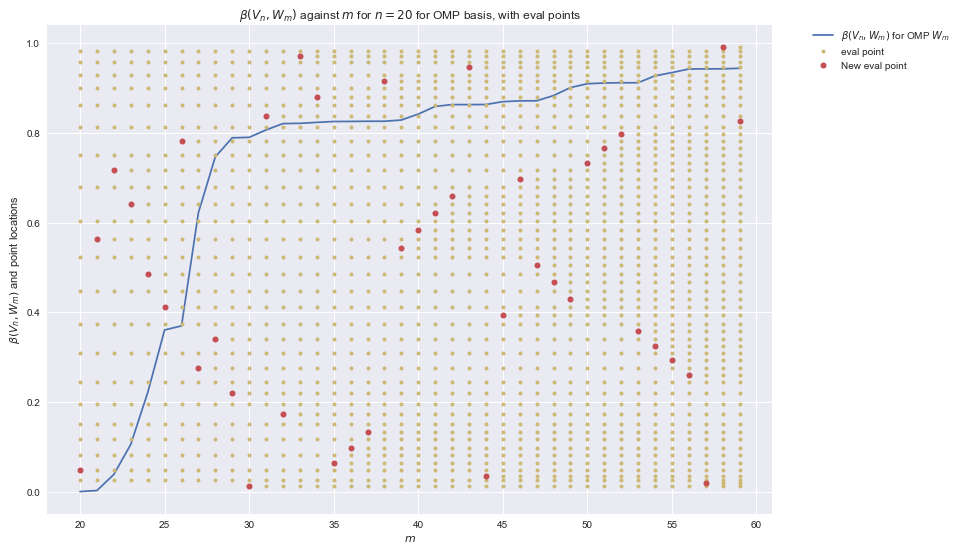

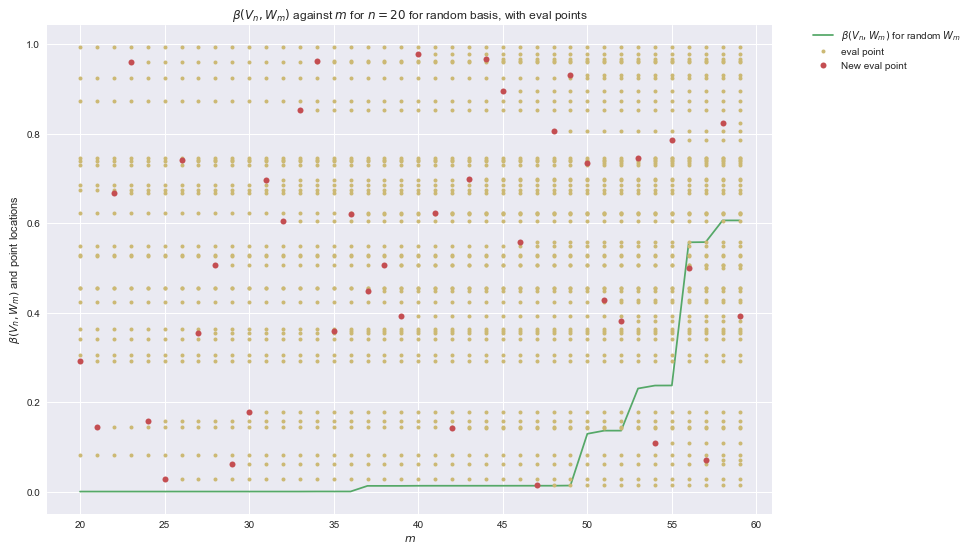

In [36]:
sns.set_palette("deep")
cp = sns.color_palette()

Wm_omp = Wms_omp[1]
Vn = Vn.subspace(slice(0, 20))
b_omp = bs_omp[1,:]
b_rand = bs_rand[1,:]

n=20
m=200

axs = []
fig = plt.figure(figsize=(13, 9))
ax = fig.add_subplot(1, 1, 1, title=r'$\beta(V_n, W_m)$ against $m$ for $n={{{0}}}$'.format(n))

plt.plot(range(n,m), b_omp[n:], label=r'OMP constructed $W_m$')
plt.plot(range(n,m), b_rand[n:], label=r'Random $W_m$')

ax.set(xlabel=r'$m$', ylabel=r'$\beta(V_n, W_m)$')
plt.legend(loc=2)
plt.show()


# Plot the evaluation points in the Wm_rand basis 
# (note that the basis is infact orthonormalised so this isn't *quite* an accurate picture)
Wm_points = [vec.elements.values_array()[0].keys_array() for vec in Wm_omp.vecs]

axs = []
fig = plt.figure(figsize=(13, 9))
ax = fig.add_subplot(1, 1, 1, title=r'$\beta(V_n, W_m)$ against $m$ for $n={{{0}}}$ for OMP basis, with eval points'.format(n))
ax.set(xlabel=r'$m$', ylabel=r'$\beta(V_n, W_m)$ and point locations')
plt.plot(range(n,n+40), b_omp[20:60], color=cp[0], label=r'$\beta(V_n, W_m)$ for OMP $W_m$')

plt.plot(n * np.ones(n-1), Wm_points[:n-1], 'o', color=cp[4], markersize=4, label='eval point')
plt.plot(n, Wm_points[n-1], 'o', color=cp[2], markersize=6, label='New eval point')
for m_plot in range(n, n+40-1):
    plt.plot((m_plot+1) * np.ones(m_plot), Wm_points[:m_plot], 'o', color=cp[4], markersize=4)
    plt.plot(m_plot+1, Wm_points[m_plot], 'o', color=cp[2], markersize=6)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


# Plot the evaluation points in the Wm_rand basis 
# (note that the basis is infact orthonormalised so this isn't *quite* an accurate picture)
Wm_points = [vec.elements.values_array()[0].keys_array() for vec in Wm_rand.vecs]
Wm_o_coeffs = [vec.elements.values_array()[0].values_array() for vec in Wm_rand_o.vecs]

axs = []
fig = plt.figure(figsize=(13, 9))
ax = fig.add_subplot(1, 1, 1, title=r'$\beta(V_n, W_m)$ against $m$ for $n={{{0}}}$ for random basis, with eval points'.format(n))
ax.set(xlabel=r'$m$', ylabel=r'$\beta(V_n, W_m)$ and point locations')
plt.plot(range(n,n+40), b_rand[20:60], color=cp[1], label=r'$\beta(V_n, W_m)$ for random $W_m$')

plt.plot(n * np.ones(n-1), Wm_points[:n-1], 'o', color=cp[4], markersize=4, label='eval point')
plt.plot(n, Wm_points[n-1], 'o', color=cp[2], markersize=6, label='New eval point')
for m_plot in range(n, n+40-1):
    plt.plot((m_plot+1) * np.ones(m_plot), Wm_points[:m_plot], 'o', color=cp[4], markersize=4)
    plt.plot(m_plot+1, Wm_points[m_plot], 'o', color=cp[2], markersize=6)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In [ ]:
bs_unif_int = np.zeros((len(ns), m))
Vn = pat.make_sin_basis(ns[-1])

Wms_unif_int = []

for j, n in enumerate(ns):
    for i in range(n, m):
        
        Wm_unif_int = pat.Basis([pat.FuncVector(params=[[x]],coeffs=[[1.0]],funcs=['H1UIDelta']) for x in np.linspace(0.0, 1.0, i, endpoint=False)+0.5/i])
        Wm_unif_int_o = Wm_unif_int.orthonormalise()

        BP_ui = pat.BasisPair(Wm_unif_int_o, Vn.subspace(slice(0,n)))
        FB_ui = BP_ui.make_favorable_basis()
        bs_unif_int[j, i] = FB_ui.beta()

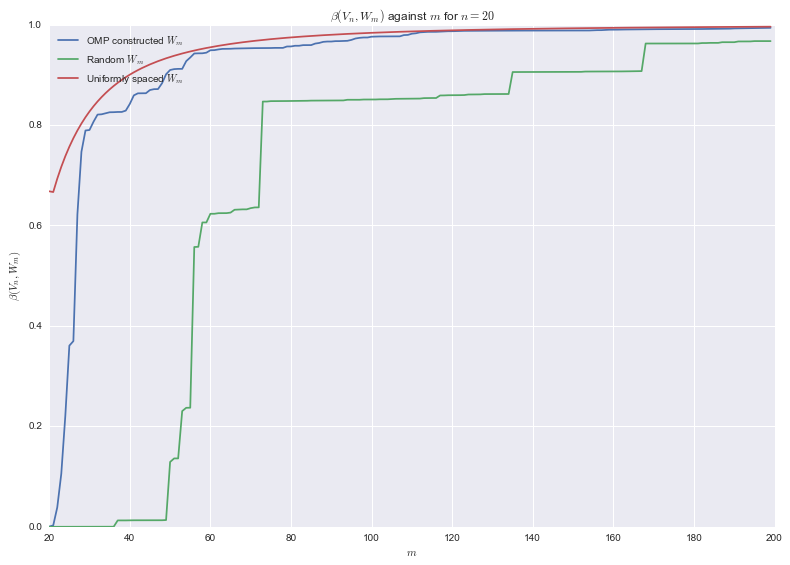

In [16]:
n = ns[1]
Wm_omp = Wms_omp[1]
Vn = Vn.subspace(slice(0, 20))
b_omp = bs_omp[1,:]
b_rand = bs_rand[1,:]
b_ui = bs_unif_int[1,:]

axs = []
fig = plt.figure(figsize=(13, 9))
ax = fig.add_subplot(1, 1, 1, title=r'$\beta(V_n, W_m)$ against $m$ for $n={{{0}}}$'.format(n))

plt.plot(range(n,m), b_omp[n:], label=r'OMP constructed $W_m$')
plt.plot(range(n,m), b_rand[n:], label=r'Random $W_m$')
plt.plot(range(n,m), b_ui[n:], label=r'Uniformly spaced $W_m$')

ax.set(xlabel=r'$m$', ylabel=r'$\beta(V_n, W_m)$')
plt.legend(loc=2)
plt.show()


## Lets look at some bases constructed on the cluster, and examine $m$ vs $n$ for a fixed minimum $\beta(V_n,W_m)$
Here we have used a large dictionary, where $\mathcal{D}$ has $N = 10^6$ elements. Surprisingly we get very very good results: $\beta(V_n, W_m)\to 1$ quite quickly

In [6]:
m=200
ns = [5, 10, 20, 40]#, 100]
bs_unif = np.zeros((len(ns), m))
bs_rand = np.zeros((len(ns), m))
bs_arb = np.zeros((len(ns), m))

gammas = np.arange(0., 1.1, 0.1)
m_gammas_unif = np.zeros((len(ns), len(gammas)))
m_gammas_rand = np.zeros((len(ns), len(gammas)))
m_gammas_arb = np.zeros((len(ns), len(gammas)))

for j, n in enumerate(ns):
    Vn = pat.make_sin_basis(n)
    
    omp_unif_x = np.load('omp_x_unif_{0}_10000.npy'.format(n))
    Wm_omp_unif = pat.Basis(vecs=[pat.FuncVector([[x]], [[1.0]], ['H1UIDelta']) for x in omp_unif_x])
    Wm_omp_unif_o = Wm_omp_unif.orthonormalise()

    omp_rand_x = np.load('omp_x_rand_{0}_10000.npy'.format(n))
    Wm_omp_rand = pat.Basis(vecs=[pat.Vector([[x]], [[1.0]], ['H1UIDelta']) for x in omp_rand_x])
    Wm_omp_rand_o = Wm_omp_rand.orthonormalise()

    Wm_arb = pat.make_random_delta_basis(m)
    Wm_arb_o = Wm_arb.orthonormalise()
    
    for i in range(n, m):
        BP_unif = pat.BasisPair(Wm_omp_unif_o.subspace(slice(0,i)), Vn)
        FB_unif = BP_unif.make_favorable_basis()
        bs_unif[j,i] = FB_unif.beta()

        BP_rand = pat.BasisPair(Wm_omp_rand_o.subspace(slice(0,i)), Vn)
        FB_rand = BP_rand.make_favorable_basis()
        bs_rand[j,i] = FB_rand.beta()
    
        BP_arb = pat.BasisPair(Wm_arb_o.subspace(slice(0,i)), Vn)
        FB_arb = BP_arb.make_favorable_basis()
        bs_arb[j,i] = FB_arb.beta()
    
    # Make the pivot data - the minimum m to reach some beta
    for i, gamma in enumerate(gammas):
        
        m_gammas_unif[j, i] = np.searchsorted(bs_unif[j,:], gamma)
        m_gammas_rand[j, i] = np.searchsorted(bs_rand[j,:], gamma)
        m_gammas_arb[j, i] = np.searchsorted(bs_arb[j,:], gamma)
        

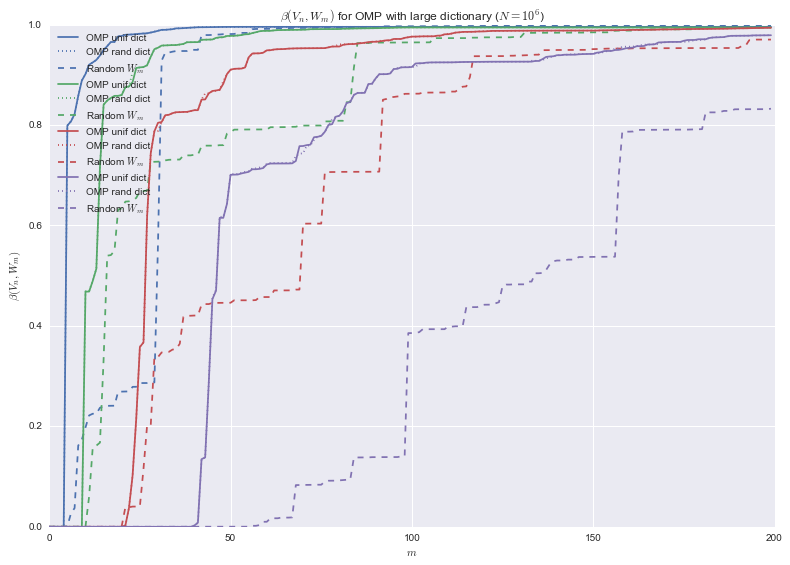

"THIS PLOT BELOW IS INTERESTING BUT CONFUSING: COMMENTED OUT FOR NOW\naxs = []\nfig = plt.figure(figsize=(13, 9))\nax = fig.add_subplot(1, 1, 1, title=r'Minimum $m$ to attain $\\gamma$'.format(n))\n\nfor i, n in enumerate(ns):\n    \n    plt.plot(gammas, m_gammas_unif[i, :], label=r'OMP unif dict', color=cp[i])\n    #plt.plot(gammas, m_gammas_rand[i, :], ':', label=r'OMP rand dict', color=cp[i])\n    plt.plot(gammas, m_gammas_arb[i, :], '--', label=r'Random $W_m$', color=cp[i])\n    \nax.set(xlabel=r'$\\gamma$', ylabel=r'$\\mathrm{argmin}\\{m : \x08eta(V_n, W_m) > \\gamma \\}$')\nplt.legend(loc=2)\nplt.show()\n"

In [7]:
sns.set_palette("deep")
cp = sns.color_palette()

axs = []
fig = plt.figure(figsize=(13, 9))
ax = fig.add_subplot(1, 1, 1, title=r'$\beta(V_n, W_m)$ for OMP with large dictionary ($N=10^6$)')

for i, n in enumerate(ns):
    
    plt.plot(range(m), bs_unif[i, :], label=r'OMP unif dict', color=cp[i])
    plt.plot(range(m), bs_rand[i, :], ':', label=r'OMP rand dict', color=cp[i])
    plt.plot(range(m), bs_arb[i, :], '--', label=r'Random $W_m$', color=cp[i])
    
ax.set(xlabel=r'$m$', ylabel=r'$\beta(V_n, W_m)$')
plt.legend(loc=2)
plt.show()

"""THIS PLOT BELOW IS INTERESTING BUT CONFUSING: COMMENTED OUT FOR NOW
axs = []
fig = plt.figure(figsize=(13, 9))
ax = fig.add_subplot(1, 1, 1, title=r'Minimum $m$ to attain $\gamma$'.format(n))

for i, n in enumerate(ns):
    
    plt.plot(gammas, m_gammas_unif[i, :], label=r'OMP unif dict', color=cp[i])
    #plt.plot(gammas, m_gammas_rand[i, :], ':', label=r'OMP rand dict', color=cp[i])
    plt.plot(gammas, m_gammas_arb[i, :], '--', label=r'Random $W_m$', color=cp[i])
    
ax.set(xlabel=r'$\gamma$', ylabel=r'$\mathrm{argmin}\{m : \beta(V_n, W_m) > \gamma \}$')
plt.legend(loc=2)
plt.show()
"""

## Ok, lets look quickly at the points generated with the large dictionary, versus the points generated above with the small dictionary
We actually see that the results for $\beta(V_n,W_m)$ are almost identical for the two dictionaries, which is encouraging.

NameError: name 'bs_unif' is not defined

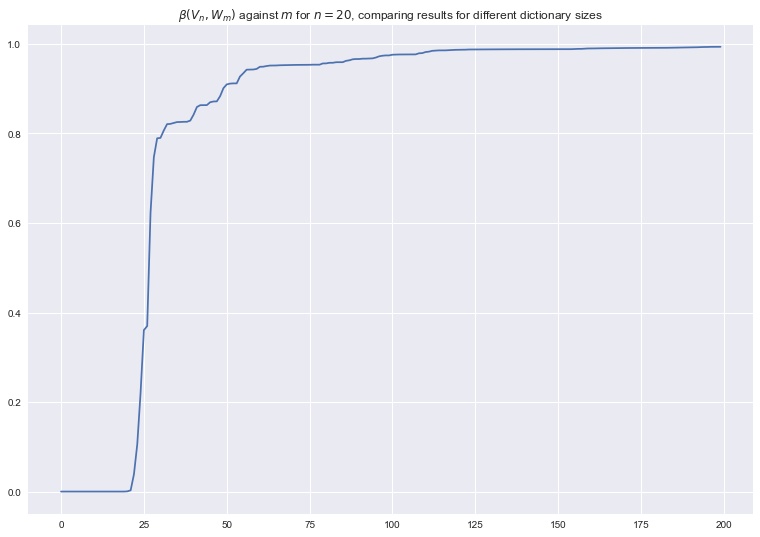

In [5]:
sns.set_palette("deep")
cp = sns.color_palette()

Wm_omp = Wms_omp[1]
Vn = Vn.subspace(slice(0, 20))
b_omp = bs_omp[1,:]
n=20

axs = []
fig = plt.figure(figsize=(13, 9))
ax = fig.add_subplot(1, 1, 1, title=r'$\beta(V_n, W_m)$ against $m$ for $n={{{0}}}$, comparing results for different dictionary sizes'.format(n))

plt.plot(range(m), b_omp[:], label=r'Small dictionary')
plt.plot(range(m), bs_unif[2, :], label=r'Large dictionary')

ax.set(xlabel=r'$m$', ylabel=r'$\beta(V_n, W_m)$')
plt.legend(loc=2)
plt.show()

# Plot the evaluation points in the Wm_omp basis - generated from a small dictionary
Wm_points = [vec.elements[0][0] for vec in Wm_omp.vecs]

axs = []
fig = plt.figure(figsize=(13, 9))
ax = fig.add_subplot(1, 1, 1, title=r'$\beta(V_n, W_m)$ against $m$ for $n={{{0}}}$ for small dictionary OMP basis, with eval points'.format(n))
ax.set(xlabel=r'$m$', ylabel=r'$\beta(V_n, W_m)$ and point locations')
plt.plot(range(n,n+40), b_omp[20:60], color=cp[1], label=r'$\beta(V_n, W_m)$ for OMP $W_m$')

plt.plot(n * np.ones(n-1), Wm_points[:n-1], 'o', color=cp[4], markersize=4, label='eval point')
plt.plot(n, Wm_points[n-1], 'o', color=cp[2], markersize=6, label='New eval point')
for m_plot in range(n, n+40-1):
    plt.plot((m_plot+1) * np.ones(m_plot), Wm_points[:m_plot], 'o', color=cp[4], markersize=4)
    plt.plot(m_plot+1, Wm_points[m_plot], 'o', color=cp[2], markersize=6)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


# Now for the Wm_omp_unif basis - generated from a large dictionary
omp_unif_x = np.load('omp_x_unif_{0}_10000.npy'.format(n))
Wm_omp_unif = pat.Basis(vecs=[omp.Vector([x], [1.0], ['H1delta']) for x in omp_unif_x])

Wm_points = [vec.elements[0][0] for vec in Wm_omp_unif.vecs]

axs = []
fig = plt.figure(figsize=(13, 9))
ax = fig.add_subplot(1, 1, 1, title=r'$\beta(V_n, W_m)$ against $m$ for $n={{{0}}}$ for large dictionary OMP basis, with eval points'.format(n))
ax.set(xlabel=r'$m$', ylabel=r'$\beta(V_n, W_m)$ and point locations')
plt.plot(range(n,n+40), bs_unif[2, 20:60], color=cp[1], label=r'$\beta(V_n, W_m)$ for OMP $W_m$')

plt.plot(n * np.ones(n-1), Wm_points[:n-1], 'o', color=cp[4], markersize=4, label='eval point')
plt.plot(n, Wm_points[n-1], 'o', color=cp[2], markersize=6, label='New eval point')
for m_plot in range(n, n+40-1):
    plt.plot((m_plot+1) * np.ones(m_plot), Wm_points[:m_plot], 'o', color=cp[4], markersize=4)
    plt.plot(m_plot+1, Wm_points[m_plot], 'o', color=cp[2], markersize=6)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

print(bs_unif[2, 19:30])